## Dual-tone Multifrequency Dialing
![](data/dtmf.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack as fft
from sklearn.linear_model import Lasso
from IPython.display import Audio
plt.style.use('ggplot')
%matplotlib inline

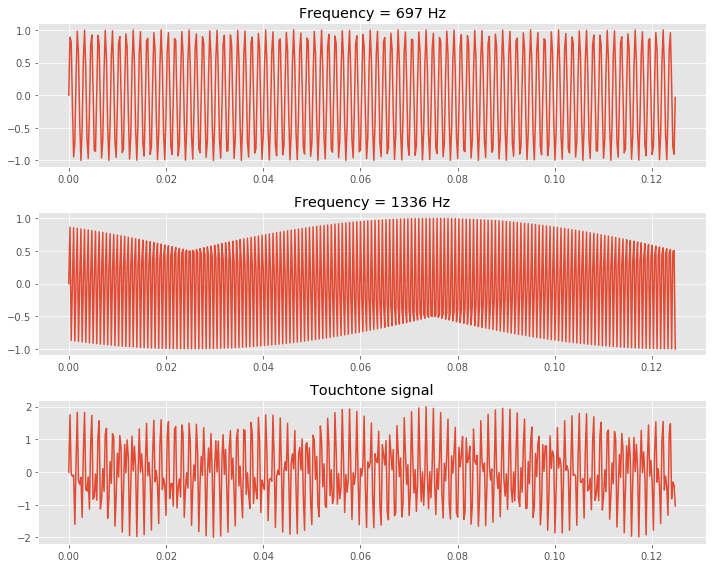

In [2]:
FS = 4000 # Sampling frequency in Hertz

f1, f2 = 697, 1336 # Pick any two touchtone frequencies

duration = 1 / 2
n_samples = 500

t = np.linspace(0, duration, int(duration * FS))
s1 = np.sin(2 * np.pi * f1 * t)
s2 = np.sin(2 * np.pi * f2 * t)
S = s1 + s2

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
ax[0].plot(t[:n_samples], s1[:n_samples])
ax[0].set_title('Frequency = {} Hz'.format(f1))
ax[1].plot(t[:n_samples], s2[:n_samples])
ax[1].set_title('Frequency = {} Hz'.format(f2))
ax[2].plot(t[:n_samples], S[:n_samples])
ax[2].set_title('Touchtone signal')

plt.tight_layout()

In [ ]:
Audio(np.tile(S, 10), rate=8000)

In [ ]:
F = fft.rfft(S)
plt.figure(figsize=(12, 6))
plt.plot(np.abs(F))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Spectral Power')

# Discrete Fourier Transform
## Convert a sequence of complex numbers* into another sequence of complex numbers*
## $$X_{k} = \sum_{n=0}^{N-1} x_{n}e^{-\frac{i2\pi}{N}kn}$$

### Question: How do we convert this in equation to matrix form?

In [ ]:
N = K = S.shape[0]
D = np.ones((N, K), dtype=complex)

In [ ]:
D *= np.exp(-1j * 2 * np.pi / N)

## What we have is a matrix $\mathbf{D}$, such that
### $$\mathbf{D} \in \mathbb{C}^{N \times K}$$
### where
### $$d_{n, k} = e^{-i \frac{2\pi}{N}}$$
### $$\forall n \in [0, N - 1]$$
### $$\forall k \in [0, K - 1]$$

## What we want is a $\mathbf{D}$ such that
### $$d_{n, k} = e^{-i \frac{2\pi}{N} \times kn}$$

## Hint: $x^{yz} = (x^{y})^{z}$

In [ ]:
kmat = np.ones(D.shape, dtype=int) * np.arange(K)
kmat

In [ ]:
nmat = np.ones(D.shape, dtype=int) * np.arange(N).reshape(-1, 1)
nmat

In [ ]:
D = D ** (kmat * nmat)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].imshow(np.real(D))
ax[1].imshow(np.imag(D))

### Moment of truth!

In [ ]:
F_HAT = np.dot(S, D)
plt.figure(figsize=(12, 6))
plt.plot(np.abs(F_HAT))

## Question: What went wrong?
### If $N$ is even:
### $$\hat{F} = [F_{0}, \Re(F_{1}), \Im(F_{1}), \Re(F_{2}), \Im(F_{2}), \dots, \Im(F_{N/2})]$$

In [ ]:
FREAL, FIMAG = np.real(F_HAT), np.imag(F_HAT)
F_HAT_NEW = np.c_[FREAL[:1000], FIMAG[:1000]].ravel()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.abs(F_HAT_NEW))

## Exercise: Pick any key from the touchtone keypad, construct the signal, and find it's Spectrum

In [ ]:
# enter code here